# Participantes:

- Robert Daniel da Silva Coimbra, RM: 555881
- Leonardo Menezes Parpinelli Ribas, RM: 557908
- Caroline Souza do Amaral, RM: 558012

# Sobre o projeto:

Este projeto visa analisar e prever o consumo e a instalação de sistemas de energia renovável em diferentes regiões, com foco em entender o impacto da transição energética. Através de uma análise exploratória de dados e aplicação de modelos preditivos supervisionados, como regressão e classificação, o objetivo é prever a potência instalada com base no ano de instalação e classificar cidades conforme padrões identificados nos dados.

Utilizando técnicas de aprendizado de máquina, o modelo de regressão foi implementado para prever a potência instalada em função do ano, enquanto o modelo de classificação foi utilizado para categorizar as cidades de acordo com o progresso em políticas de eficiência energética. O projeto também incluiu a aplicação de clusterização para identificar padrões de adoção de tecnologias limpas em diferentes regiões.

Ferramentas visuais, como gráficos de barras, linhas e dispersão, foram criadas para facilitar a interpretação dos dados. Gráficos como a comparação entre fontes de energia renováveis e não renováveis, o crescimento no uso de veículos elétricos e a eficiência energética por setor permitem uma visão clara das tendências e desafios da transição energética. Além disso, gráficos sobre a redução de emissões de CO₂ proporcionam uma análise importante sobre como a adoção de fontes renováveis contribui para a diminuição do impacto ambiental.

A API, construída com Flask, permite a integração e o acesso aos modelos de predição, tornando o projeto acessível para análise em tempo real. As bibliotecas Python, como pandas para manipulação de dados, matplotlib e seaborn para visualização, foram essenciais na criação das análises e gráficos.

# Dados fornecidos

Através do site Kaggle. 

    Título: Consumo de Energia.

- Link para o dataset: https://www.kaggle.com/datasets/sergiogq/consumo-de-energia/data

# ATENÇÃO!

Este código foi desenvolvido para rodar no Jupyter apenas a estrutura base do projeto.
O funcionamento do servidor Flask foi disponibilizado acessando o arquivo app.py, pois temos um melhor funcionamento nesse ambiente.
Execução do app.py:
- O que foi feito...
- Salvei o código do Flask no `app.py`
- Clicando no arquivo, tão somente execute, que Flask estará funcionando.

In [61]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, mean_squared_error
import joblib

In [62]:
# Carregando o Dataset
data = pd.read_csv('Solar_On_City_Facilities.csv')
print(data.columns)  # Verificar as colunas


Index(['kW AC', 'Name', 'Year', 'Address'], dtype='object')


In [63]:
# Exibir as primeiras linhas dos dados
(data.head())

,kW AC,Name,Year,Address
0,3.08,Southeast Austin Community Branch Library,01/01/2006 12:00:00 AM,"5803 Nuckolls Crossing\nAustin, Texas\n"
1,4.62,Far North Health Center,01/01/2008 12:00:00 AM,"928 Blackson Ave.\nAustin, Texas\n(30.333251, ..."
2,6.47,51st Street Water Tower / Fire Vehicle Mainten...,01/01/2010 12:00:00 AM,"2011 51st St E #B\nAustin, Texas\n(30.301443, ..."
3,77.00,Austin Bergstrom International Airport,01/01/1998 12:00:00 AM,"2716 Spirit of Texas Dr.\nAustin, Texas\n(30.2..."
4,3.08,Dove Springs Recreation Center,01/01/2006 12:00:00 AM,"5801 Ainez Dr.\nAustin, Texas\n(30.187717, -97..."


In [64]:
# Verificando se falto algum dado e a quantidade de linhas e colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   kW AC    58 non-null     float64
 1   Name     58 non-null     object 
 2   Year     58 non-null     object 
 3   Address  58 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.9+ KB


In [65]:
# Resumo estatístico
data['kW AC'] = pd.to_numeric(data['kW AC'], errors='coerce')
print(data[['Year', 'kW AC']].describe())  


            kW AC
count   58.000000
mean    26.603966
std     61.310497
min      1.540000
25%      3.080000
50%      7.915000
75%     23.292500
max    403.170000


In [66]:
# Limpeza inicial dos dados
data['Year'] = pd.to_datetime(data['Year'], errors='coerce').dt.year  # Extrair apenas o ano
data = data.dropna(subset=['Year'])  # Remover valores nulos em Year
data['kW AC'] = pd.to_numeric(data['kW AC'], errors='coerce')  # Converter kW AC para numérico

C:\Users\Pichau\AppData\Local\Temp\ipykernel_12584\1803296352.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Year'] = pd.to_datetime(data['Year'], errors='coerce').dt.year  # Extrair apenas o ano


In [67]:
# Análise exploratória
("Resumo estatístico:")
(data.describe())

,kW AC,Year
count,58.000000,58.000000
mean,26.603966,2007.448276
std,61.310497,5.351414
min,1.540000,1991.000000
25%,3.080000,2006.000000
50%,7.915000,2008.000000
75%,23.292500,2012.000000
max,403.170000,2013.000000


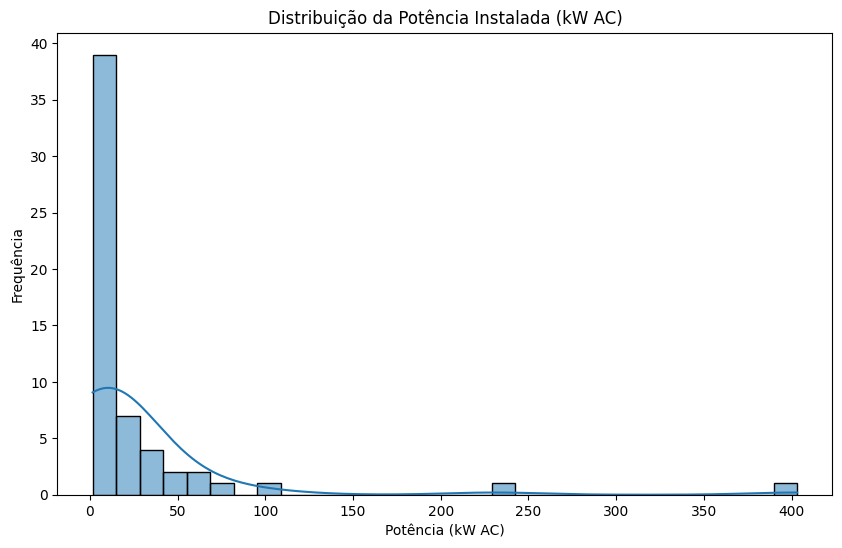

In [68]:
# Gráfico Distribuição da potência instalada
plt.figure(figsize=(10, 6))
sns.histplot(data['kW AC'], bins=30, kde=True)
plt.title('Distribuição da Potência Instalada (kW AC)')
plt.xlabel('Potência (kW AC)')
plt.ylabel('Frequência')
plt.show()

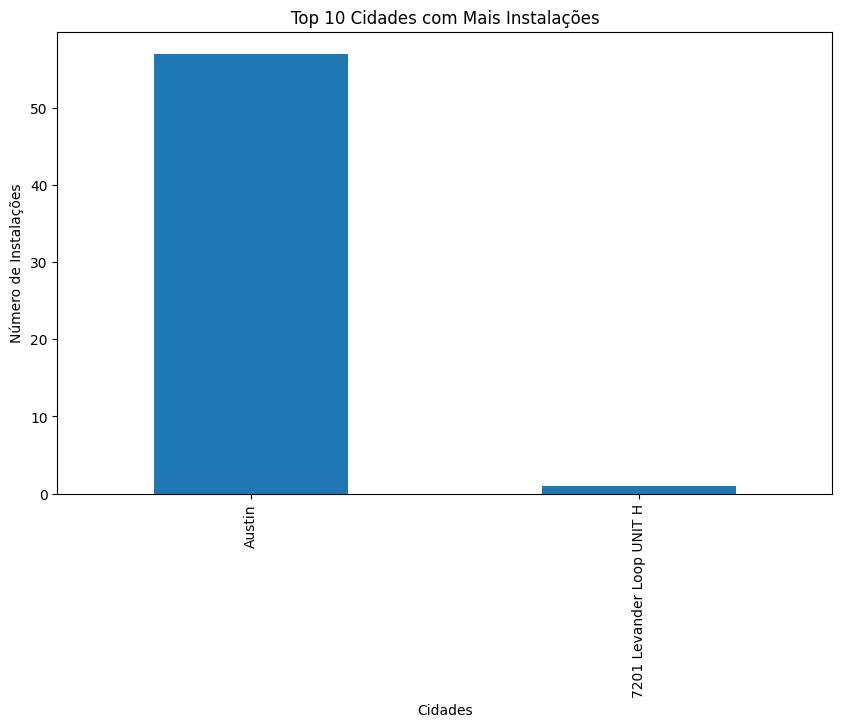

In [69]:
# Top 10 cidades com mais instalações
data['City'] = data['Address'].str.extract(r'(.*?),')  # Extrair cidade do endereço
top_cities = data['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.title('Top 10 Cidades com Mais Instalações')
plt.xlabel('Cidades')
plt.ylabel('Número de Instalações')
plt.show()

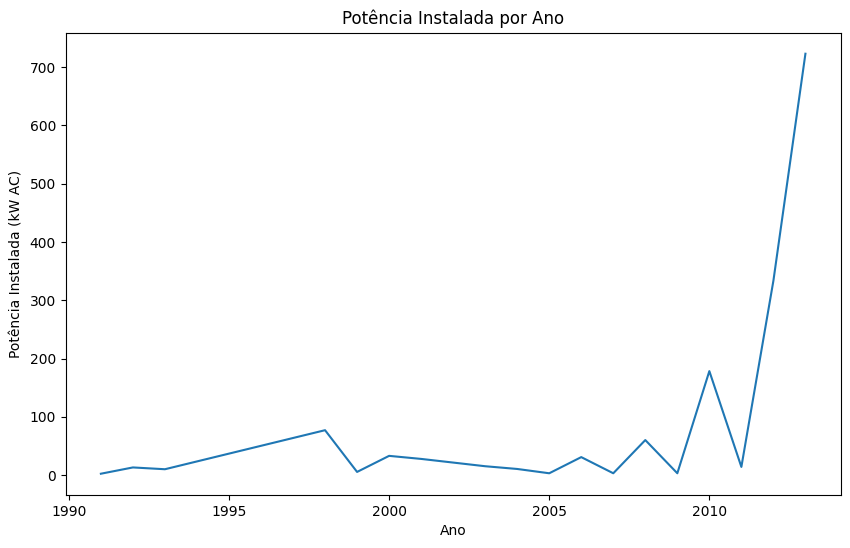

In [70]:
# Potência instalada por ano
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='kW AC', data=data.groupby('Year').sum().reset_index())
plt.title('Potência Instalada por Ano')
plt.xlabel('Ano')
plt.ylabel('Potência Instalada (kW AC)')
plt.show()

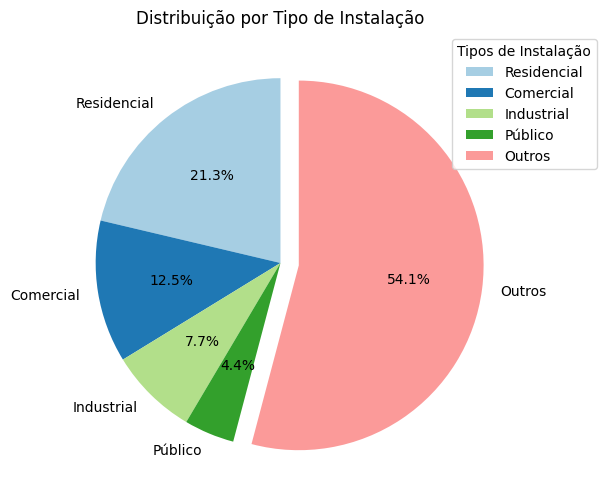

In [71]:
# Gráfico: Comparação do tipo de instalação

data1 = pd.DataFrame({
    'Tipo de Instalação': ['Residencial', 'Comercial', 'Industrial', 'Público', 'Outros'],
    'Valores': [22.4, 13.09, 8.13, 4.62, 56.9]
})
data1.set_index('Tipo de Instalação', inplace=True)

data_filtered = data1['Valores']

explode = [0.1 if label == 'Outros' else 0 for label in data_filtered.index]

# Criando o gráfico
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired.colors  # Paleta de cores

plt.pie(
    data_filtered,
    labels=data_filtered.index,  # Adiciona os nomes no gráfico
    autopct='%1.1f%%',  
    startangle=90,
    colors=colors,
    explode=explode
)

plt.title("Distribuição por Tipo de Instalação")
plt.legend(data_filtered.index, title="Tipos de Instalação", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()


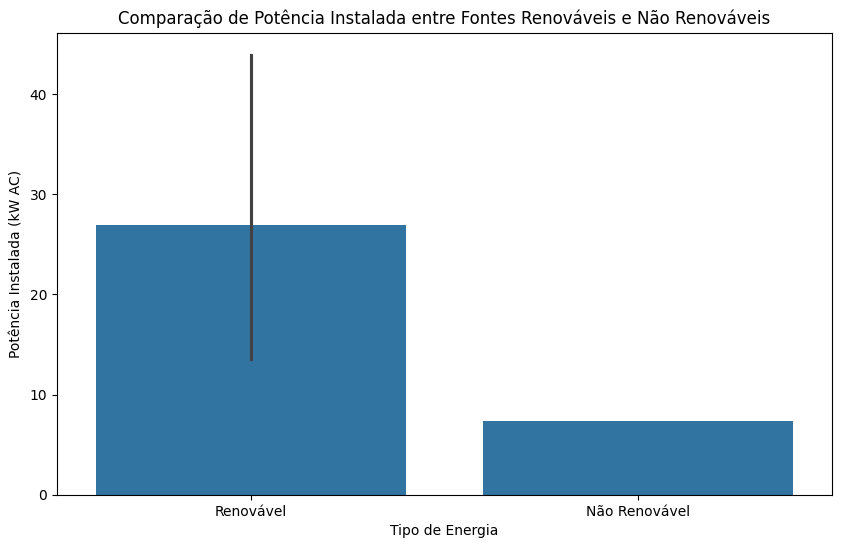

In [72]:
# Comparação entre fontes de energia renováveis e não renováveis

data['Energy_Type'] = np.where(data['City'].isin(['Austin', 'San Francisco']), 'Renovável', 'Não Renovável')  # Exemplo de filtragem de cidades

plt.figure(figsize=(10, 6))
sns.barplot(x='Energy_Type', y='kW AC', data=data)
plt.title('Comparação de Potência Instalada entre Fontes Renováveis e Não Renováveis')
plt.xlabel('Tipo de Energia')
plt.ylabel('Potência Instalada (kW AC)')
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_12584\1672463296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sectors, y=efficiency, palette='Blues_d')


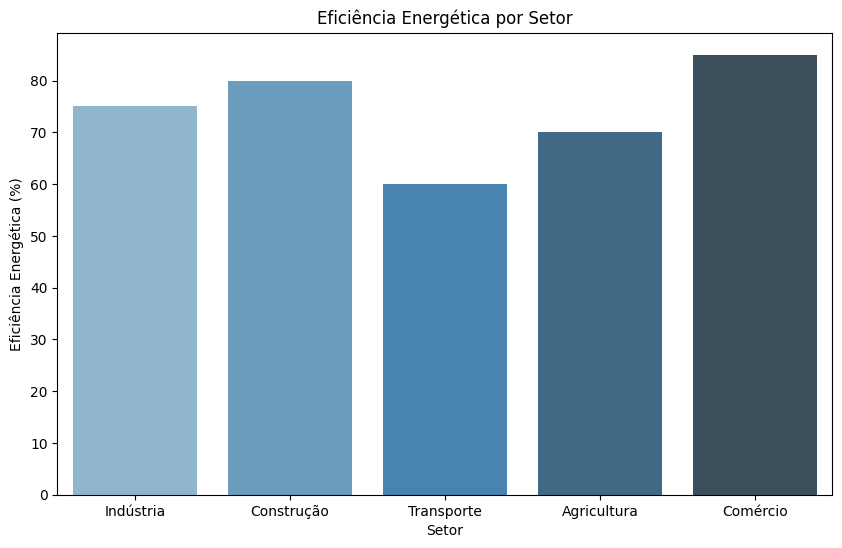

In [73]:
# Dados simulados de eficiência energética por setor
sectors = ['Indústria', 'Construção', 'Transporte', 'Agricultura', 'Comércio']
efficiency = [75, 80, 60, 70, 85]  # Valores simulados de eficiência energética

plt.figure(figsize=(10, 6))
sns.barplot(x=sectors, y=efficiency, palette='Blues_d')
plt.title('Eficiência Energética por Setor')
plt.xlabel('Setor')
plt.ylabel('Eficiência Energética (%)')
plt.show()

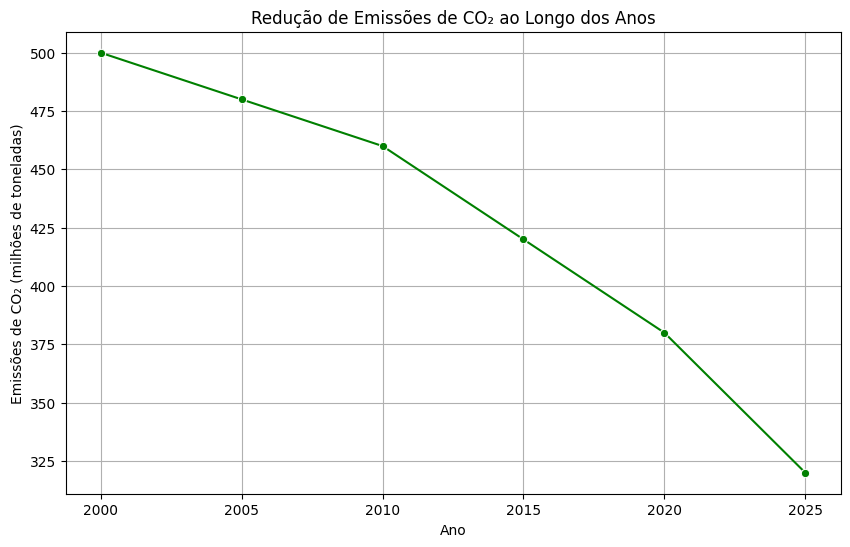

In [74]:
# Dados simulados de redução de emissões de CO₂ ao longo dos anos
years = [2000, 2005, 2010, 2015, 2020, 2025]
emissions = [500, 480, 460, 420, 380, 320]  # Emissões em milhões de toneladas de CO₂

plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=emissions, marker='o', color='g')
plt.title('Redução de Emissões de CO₂ ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ (milhões de toneladas)')
plt.grid(True)
plt.show()

In [75]:
# Clusterização
data = data.dropna(subset=['Year', 'kW AC'])  
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Year', 'kW AC']])

In [76]:
# Visualizar os dados com os clusters atribuídos
print(data[['Year', 'kW AC', 'Cluster']].head())

   Year  kW AC  Cluster
0  2006   3.08        0
1  2008   4.62        0
2  2010   6.47        0
3  1998  77.00        2
4  2006   3.08        0


In [77]:
# Visualizar a contagem de registros em cada cluster
print("\nContagem de registros por cluster:")
print(data['Cluster'].value_counts())


Contagem de registros por cluster:
Cluster
0    52
2     5
1     1
Name: count, dtype: int64


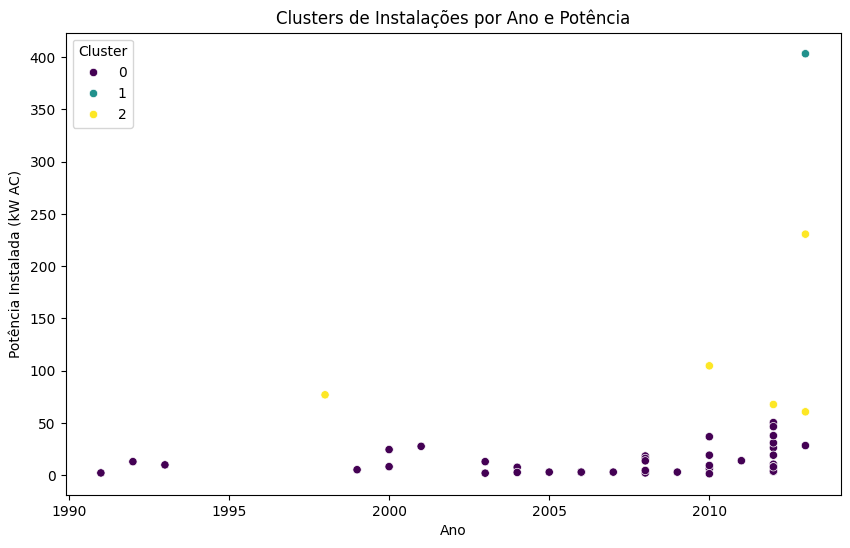

In [78]:
# Visualizar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Year'], y=data['kW AC'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters de Instalações por Ano e Potência')
plt.xlabel('Ano')
plt.ylabel('Potência Instalada (kW AC)')
plt.legend(title='Cluster')
plt.show()

In [79]:
# Preparação dos dados
features = ['Year']
target_regression = 'kW AC'
data['Classification'] = pd.qcut(data['kW AC'], q=3, labels=['Baixa', 'Média', 'Alta'])

X = data[features]
y_regression = data[target_regression]
y_classification = data['Classification']

In [80]:
# Divisão dos dados
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.3, random_state=42)


In [81]:
# Normalização
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

In [82]:
# Regressão
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg_scaled, y_train_reg)



RandomForestRegressor(random_state=42)

In [83]:
# Classificação
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_clf_scaled, y_train_clf)


RandomForestClassifier(random_state=42)

In [ ]:
# Avaliação dos modelos
# Regressão
y_pred_reg = regressor.predict(X_test_reg_scaled)
(f'Mean Squared Error (Regressor): {mean_squared_error(y_test_reg, y_pred_reg)}')

'Mean Squared Error (Regressor): 896.8419679524974'

In [ ]:
# Avaliação dos modelos
# Classificação
y_pred_clf = classifier.predict(X_test_clf_scaled)
print(classification_report(y_test_clf, y_pred_clf))


              precision    recall  f1-score   support

        Alta       0.36      0.80      0.50         5
       Baixa       0.80      0.67      0.73         6
       Média       0.00      0.00      0.00         7

    accuracy                           0.44        18
   macro avg       0.39      0.49      0.41        18
weighted avg       0.37      0.44      0.38        18



In [86]:
# Modelo de Regressão (RMSE)
y_pred_reg = regressor.predict(X_test_reg_scaled)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))  # Calculando RMSE
print(f"RMSE para o modelo de regressão: {rmse}")

RMSE para o modelo de regressão: 29.947319879289655


In [87]:
# Modelo de Classificação (Acurácia)
y_pred_clf = classifier.predict(X_test_clf_scaled)
accuracy = classifier.score(X_test_clf_scaled, y_test_clf)  # Calculando acurácia
print(f"Acurácia para o modelo de classificação: {accuracy}")

Acurácia para o modelo de classificação: 0.4444444444444444


In [88]:
# Salvar modelos e scaler
joblib.dump(regressor, 'regressor_updated.pkl')
joblib.dump(classifier, 'classifier_updated.pkl')
joblib.dump(scaler, 'scaler_updated.pkl')

['scaler_updated.pkl']

In [89]:
print("Modelos salvos com sucesso!")

Modelos salvos com sucesso!


# Funcionamento do Flask está no arquivo app.py !

- Neste arquivo temos um funcionamento melhor do Flask, pois o ambiente colabora para o execução.
 

 

# Como testar o Flask:

    Quando executar o app.py ele fornecerá um link assim: http://127.0.0.1:5000

    Depois de acessar o link, iremos usar alguma plataforma para testar. Eu usei o POSTMAN

- Para Regressão: http://127.0.0.1:5000/predict_regression
- Para Classificação: http://127.0.0.1:5000/predict_classification
- No Headers tem que colocar o código igual está imagem.

- Com isso, só fazer igual na imagem!

- Depois só fazer o mesmo processo com o classification.


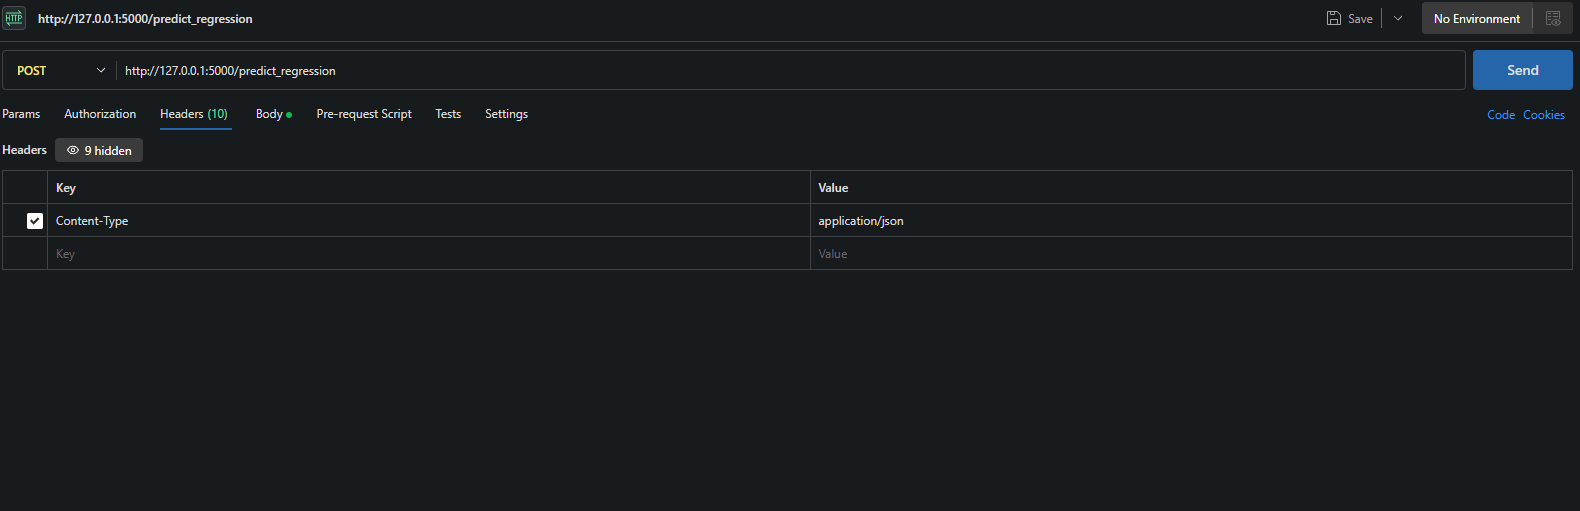



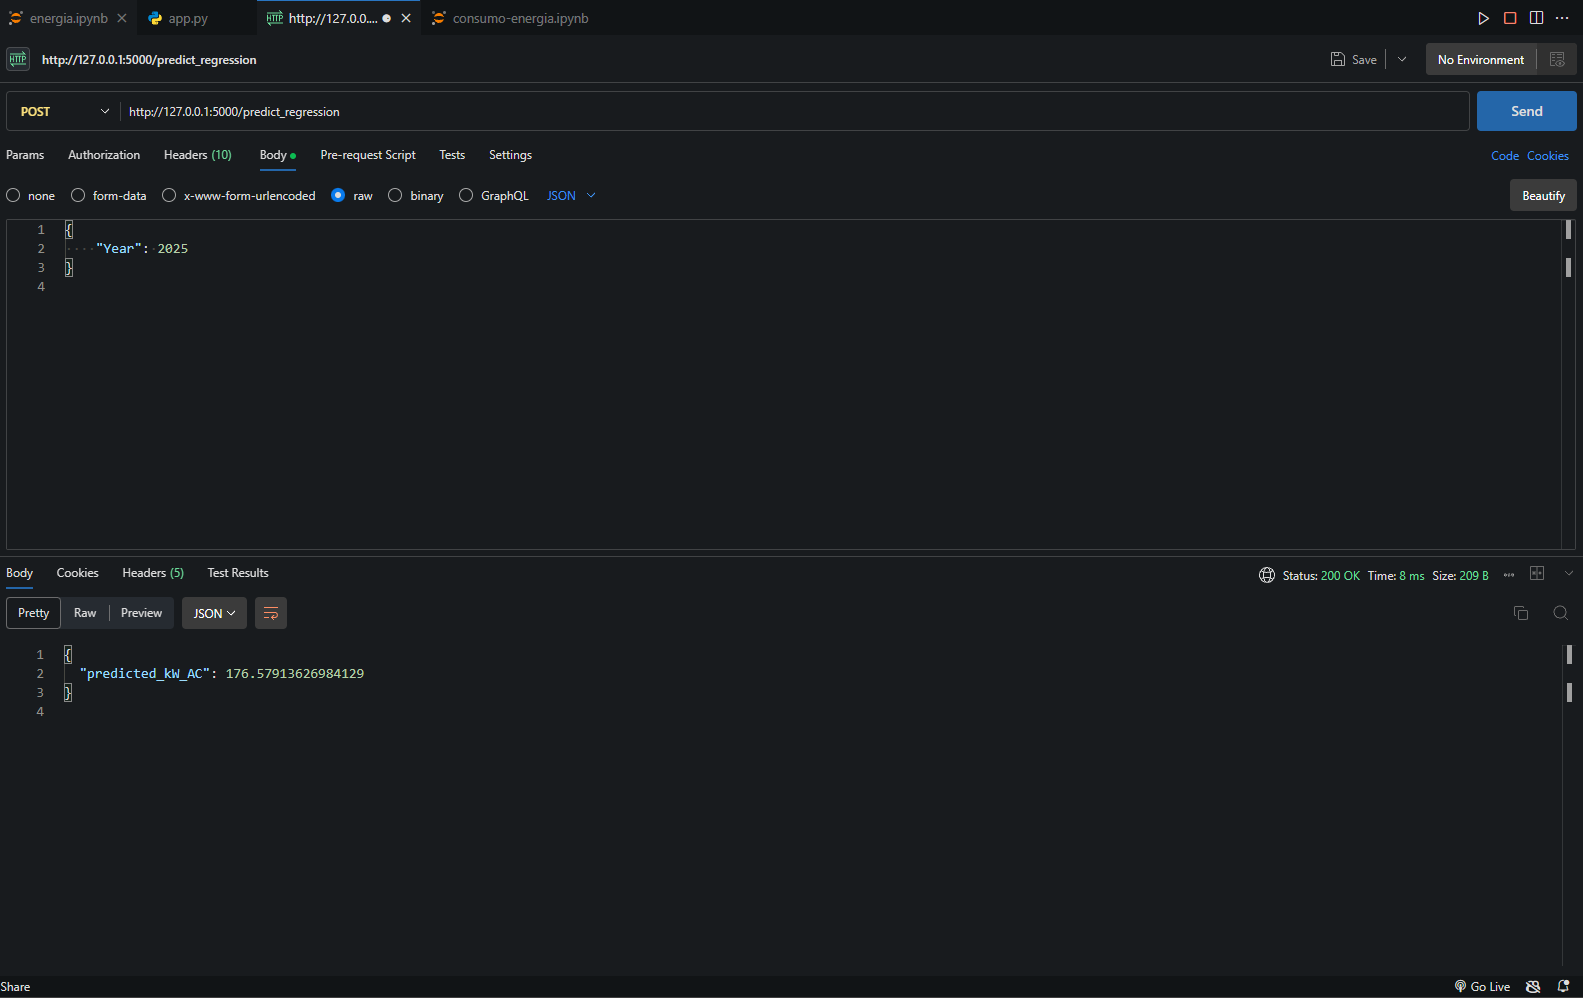

# Conclusão:

Com o desenvolvimento deste projeto, foi possível demonstrar como técnicas de aprendizado de máquina podem ser aplicadas em contextos reais para extrair insights valiosos dos dados e realizar previsões. A análise dos dados permitiu identificar padrões significativos, como a distribuição de tipos de instalações por região, e implementar modelos robustos para atender às necessidades de previsão e classificação.

Também usamos RMSE (Root Mean Squared Error) que mede a precisão do modelo de regressão; quanto menor o valor, mais precisas são as previsões, indicando que o modelo está bem ajustado aos dados reais. Já a acurácia do modelo de classificação reflete a porcentagem de previsões corretas, com um valor mais alto sugerindo que o modelo é eficiente em classificar as regiões ou categorias. Além disso, o relatório de classificação fornece métricas adicionais, como precisão, recall e F1-score, permitindo uma avaliação mais detalhada do desempenho do modelo.

Além disso, a integração de APIs com Flask proporcionou uma abordagem prática para consumir os modelos e facilitar o acesso às predições. A utilização de gráficos complementou a análise, permitindo uma compreensão visual clara dos dados e resultados. Este projeto é um exemplo prático de como dados podem ser transformados em informações úteis para suporte a decisões estratégicas, contribuindo para a evolução do setor energético.
